In [1]:
library(tidyverse)
library(rpart)
library(randomForest)

disease_data <- read_csv("../input/disease-prediction-using-machine-learning/Training.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Warning message:
“Missing column names filled in: 'X134' [134]”
Warning message:
“Duplicated column names deduplicated: 'fluid_overload' => 'fluid_overload_1' [118]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  prognosis = col_character(),
  X134 = col_logical()
)
ℹ Use `spec()` for the full 

In [2]:
summary(disease_data)

    itching         skin_rash      nodal_skin_eruptions continuous_sneezing
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000      Min.   :0.00000    
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000      1st Qu.:0.00000    
 Median :0.0000   Median :0.0000   Median :0.00000      Median :0.00000    
 Mean   :0.1378   Mean   :0.1598   Mean   :0.02195      Mean   :0.04512    
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000      3rd Qu.:0.00000    
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000      Max.   :1.00000    
   shivering           chills         joint_pain     stomach_pain    
 Min.   :0.00000   Min.   :0.0000   Min.   :0.000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.00000  
 Median :0.00000   Median :0.0000   Median :0.000   Median :0.00000  
 Mean   :0.02195   Mean   :0.1622   Mean   :0.139   Mean   :0.04512  
 3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:0.000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.0000   Max.   :1.00

In [3]:
rn_disease_data <- disease_data %>%
    rename(
        spotting_urination = 'spotting_ urination',
        dischromic_patches = 'dischromic _patches',
        foul_smell_of_urine = 'foul_smell_of urine', 
        toxic_look_typhos = 'toxic_look_(typhos)')

In [4]:
names(rn_disease_data)

[1] "itching"                        "skin_rash"                     
  [3] "nodal_skin_eruptions"           "continuous_sneezing"           
  [5] "shivering"                      "chills"                        
  [7] "joint_pain"                     "stomach_pain"                  
  [9] "acidity"                        "ulcers_on_tongue"              
 [11] "muscle_wasting"                 "vomiting"                      
 [13] "burning_micturition"            "spotting_urination"            
 [15] "fatigue"                        "weight_gain"                   
 [17] "anxiety"                        "cold_hands_and_feets"          
 [19] "mood_swings"                    "weight_loss"                   
 [21] "restlessness"                   "lethargy"                      
 [23] "patches_in_throat"              "irregular_sugar_level"         
 [25] "cough"                          "high_fever"                    
 [27] "sunken_eyes"                    "breathlessness"                
 [29] "sweating"                       "dehydration"                   
 [31] "indigestion"                    "headache"                      
 [33] "yellowish_skin"                 "dark_urine"                    
 [35] "nausea"                         "loss_of_appetite"              
 [37] "pain_behind_the_eyes"           "back_pain"                     
 [39] "constipation"                   "abdominal_pain"                
 [41] "diarrhoea"                      "mild_fever"                    
 [43] "yellow_urine"                   "yellowing_of_eyes"             
 [45] "acute_liver_failure"            "fluid_overload"                
 [47] "swelling_of_stomach"            "swelled_lymph_nodes"           
 [49] "malaise"                        "blurred_and_distorted_vision"  
 [51] "phlegm"                         "throat_irritation"             
 [53] "redness_of_eyes"                "sinus_pressure"                
 [55] "runny_nose"                     "congestion"                    
 [57] "chest_pain"                     "weakness_in_limbs"             
 [59] "fast_heart_rate"                "pain_during_bowel_movements"   
 [61] "pain_in_anal_region"            "bloody_stool"                  
 [63] "irritation_in_anus"             "neck_pain"                     
 [65] "dizziness"                      "cramps"                        
 [67] "bruising"                       "obesity"                       
 [69] "swollen_legs"                   "swollen_blood_vessels"         
 [71] "puffy_face_and_eyes"            "enlarged_thyroid"              
 [73] "brittle_nails"                  "swollen_extremeties"           
 [75] "excessive_hunger"               "extra_marital_contacts"        
 [77] "drying_and_tingling_lips"       "slurred_speech"                
 [79] "knee_pain"                      "hip_joint_pain"                
 [81] "muscle_weakness"                "stiff_neck"                    
 [83] "swelling_joints"                "movement_stiffness"            
 [85] "spinning_movements"             "loss_of_balance"               
 [87] "unsteadiness"                   "weakness_of_one_body_side"     
 [89] "loss_of_smell"                  "bladder_discomfort"            
 [91] "foul_smell_of_urine"            "continuous_feel_of_urine"      
 [93] "passage_of_gases"               "internal_itching"              
 [95] "toxic_look_typhos"              "depression"                    
 [97] "irritability"                   "muscle_pain"                   
 [99] "altered_sensorium"              "red_spots_over_body"           
[101] "belly_pain"                     "abnormal_menstruation"         
[103] "dischromic_patches"             "watering_from_eyes"            
[105] "increased_appetite"             "polyuria"                      
[107] "family_history"                 "mucoid_sputum"                 
[109] "rusty_sputum"                   "lack_of_concentration"         
[111] "visual_disturbances"            "re

In [5]:
fit <- rpart(prognosis ~ itching + skin_rash + nodal_skin_eruptions + continuous_sneezing + 
             shivering + chills + joint_pain + stomach_pain + acidity + ulcers_on_tongue + muscle_wasting + 
             vomiting + burning_micturition + spotting_urination + fatigue + weight_gain + anxiety + 
             cold_hands_and_feets + mood_swings + weight_loss + restlessness + lethargy + patches_in_throat + 
             irregular_sugar_level + cough + high_fever + sunken_eyes + breathlessness + sweating + dehydration +
             indigestion + headache + yellowish_skin + dark_urine + nausea + loss_of_appetite + 
             pain_behind_the_eyes + back_pain + constipation + abdominal_pain + diarrhoea + mild_fever + 
             yellow_urine + yellowing_of_eyes + acute_liver_failure + fluid_overload + swelling_of_stomach + 
             swelled_lymph_nodes + malaise + blurred_and_distorted_vision + phlegm + throat_irritation + redness_of_eyes + sinus_pressure + runny_nose +
             congestion + chest_pain + weakness_in_limbs + fast_heart_rate + pain_during_bowel_movements + pain_in_anal_region + 
             bloody_stool + irritation_in_anus + neck_pain + dizziness + cramps + bruising + obesity + swollen_legs + 
             swollen_blood_vessels + puffy_face_and_eyes + enlarged_thyroid + brittle_nails + swollen_extremeties + 
             excessive_hunger + extra_marital_contacts + drying_and_tingling_lips + slurred_speech + knee_pain + hip_joint_pain + muscle_weakness + stiff_neck + swelling_joints + movement_stiffness + spinning_movements + loss_of_balance + unsteadiness + weakness_of_one_body_side + loss_of_smell + bladder_discomfort + foul_smell_of_urine + 
             continuous_feel_of_urine + passage_of_gases + internal_itching + toxic_look_typhos + depression + irritability + 
             muscle_pain + altered_sensorium + red_spots_over_body + belly_pain + abnormal_menstruation + dischromic_patches + 
             watering_from_eyes + increased_appetite + polyuria + family_history + mucoid_sputum + rusty_sputum + lack_of_concentration + 
             visual_disturbances + receiving_blood_transfusion + receiving_unsterile_injections + coma + stomach_bleeding + distention_of_abdomen + 
             history_of_alcohol_consumption + fluid_overload_1 + blood_in_sputum + prominent_veins_on_calf + 
             palpitations + painful_walking + pus_filled_pimples + blackheads + scurring + skin_peeling + silver_like_dusting + 
             small_dents_in_nails + inflammatory_nails + blister + red_sore_around_nose + yellow_crust_ooze, data = rn_disease_data)

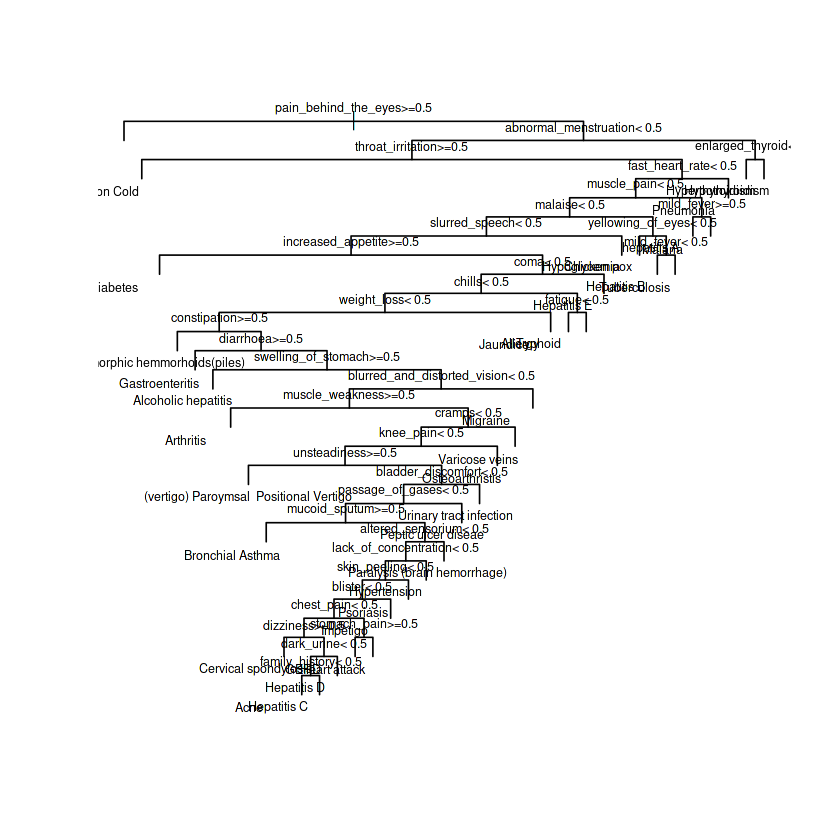

In [6]:
plot(fit, uniform = TRUE)
text(fit, cex = .6)

In [7]:
print("Disease Prediction: ")
print(head(rn_disease_data))

print("Predicting Disease: ")
print(predict(fit, head(rn_disease_data)))

print("Actual Disease: ")
print(head(rn_disease_data$prognosis))

[1] "Disease Prediction: "
# A tibble: 6 x 134
  itching skin_rash nodal_skin_eruptions continuous_sneezing shivering chills
    <dbl>     <dbl>                <dbl>               <dbl>     <dbl>  <dbl>
1       1         1                    1                   0         0      0
2       0         1                    1                   0         0      0
3       1         0                    1                   0         0      0
4       1         1                    0                   0         0      0
5       1         1                    1                   0         0      0
6       0         1                    1                   0         0      0
# … with 128 more variables: joint_pain <dbl>, stomach_pain <dbl>,
#   acidity <dbl>, ulcers_on_tongue <dbl>, muscle_wasting <dbl>,
#   vomiting <dbl>, burning_micturition <dbl>, spotting_urination <dbl>,
#   fatigue <dbl>, weight_gain <dbl>, anxiety <dbl>,
#   cold_hands_and_feets <dbl>, mood_swings <dbl>, weight_loss <dbl>,
#